<a href="https://colab.research.google.com/github/AnishaA-git/Heart_Disease/blob/master/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Latent Variable Analysis**

Import Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv("https://kmeanscluster.s3.amazonaws.com/newHeartDataset.csv")

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
print(f"Number of columns: { df.shape[1] }")

Number of columns: 13


In [ ]:
print(f"Number of rows: { df.shape[0] }")

Number of rows: 70000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df['age'] = round(df['age']/365.25,2)

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.36,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.38,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.63,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.25,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.84,1,156,56.0,100,60,1,1,0,0,0,0


Removing Outliers

In [ ]:
df.drop(df.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [ ]:
print(f"Number of rows: { df.shape[0] }")

Number of rows: 68764


In [ ]:
N = 30000
df = df.iloc[N: , :]

In [ ]:
print(f"Number of rows: { df.shape[0] }")

Number of rows: 38764


# Logistic Regression on Raw Dataset

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
30543,43663,55.60,1,155,57.0,100,80,3,3,0,0,1,1
30544,43664,60.18,1,156,77.0,120,80,3,1,0,0,1,0
30545,43665,49.95,1,172,68.0,120,80,1,1,0,0,1,0
30546,43666,50.05,1,190,75.0,120,60,1,1,0,0,1,0
30547,43668,61.48,2,185,86.0,130,90,2,1,1,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3837 1093]
 [1565 3196]]


0.7257248993911877

# Adding Computed Latent Variable to Dataset

In [ ]:
df.insert(5, 'bmi', round((df['weight']/(df['height']/100)**2), 2))

In [ ]:
df.describe()

,id,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,38764.000000,38764.000000,38764.000000,38764.000000,38764.000000,38764.000000,38764.000000,38764.000000,38764.000000,38764.000000,38764.000000,38764.000000,38764.000000,38764.000000
mean,71765.638840,53.313627,1.347358,164.330074,74.143790,27.528168,126.604582,81.372794,1.367609,1.227763,0.086369,0.053632,0.804999,0.496595
std,16247.454273,6.743706,0.476137,8.178323,14.352488,5.745538,16.634831,9.622718,0.680826,0.573564,0.280911,0.225293,0.396206,0.499995
min,43663.000000,29.730000,1.000000,57.000000,11.000000,3.470000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,57734.750000,48.370000,1.000000,159.000000,65.000000,23.880000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,71737.500000,53.960000,1.000000,165.000000,72.000000,26.375000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,85846.500000,58.410000,2.000000,170.000000,82.000000,30.250000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.920000,2.000000,198.000000,200.000000,187.750000,220.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Removing Outliers

In [ ]:
df.drop(df.query('bmi >60 or bmi <15').index, axis=0, inplace=True)

In [ ]:
print(f"Number of rows: { df.shape[0] }")

Number of rows: 38722


In [ ]:
df.insert(3, "female", (df['gender']==1).astype(int))
df.insert(4, 'male', (df['gender']==2).astype(int))
df.drop(['gender', 'id'], axis=1, inplace=True)

In [ ]:
df.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
30543,55.60,1,0,155,57.0,23.73,100,80,3,3,0,0,1,1
30544,60.18,1,0,156,77.0,31.64,120,80,3,1,0,0,1,0
30545,49.95,1,0,172,68.0,22.99,120,80,1,1,0,0,1,0
30546,50.05,1,0,190,75.0,20.78,120,60,1,1,0,0,1,0
30547,61.48,0,1,185,86.0,25.13,130,90,2,1,1,1,1,0


# Categorizing BP to Normal/High

In [ ]:
def BPCategorize(x,y):
    if x<130 and y<90:
        return 0
    elif x>=130 and y>=90:
        return 1
    # elif x<=139 or y<=89:
    #     return 2
    # elif x<=180 or y<=120:
    #     return 3
    # elif x>180 or y>120:
    #     return 4
    else:
        return 0
    
df.insert(8, "bp_cat", df.apply(lambda row: BPCategorize(row['ap_hi'], row['ap_lo']), axis=1))
df['bp_cat'].value_counts()

0    28643
1    10079
Name: bp_cat, dtype: int64

In [ ]:
df.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_cat,cholesterol,gluc,smoke,alco,active,cardio
30543,55.60,1,0,155,57.0,23.73,100,80,0,3,3,0,0,1,1
30544,60.18,1,0,156,77.0,31.64,120,80,0,3,1,0,0,1,0
30545,49.95,1,0,172,68.0,22.99,120,80,0,1,1,0,0,1,0
30546,50.05,1,0,190,75.0,20.78,120,60,0,1,1,0,0,1,0
30547,61.48,0,1,185,86.0,25.13,130,90,1,2,1,1,1,1,0


In [ ]:
base_color = sb.color_palette()[0]
def gender(x, y):
    if x==1:
        return 'female'
    else:
        return 'male'

''

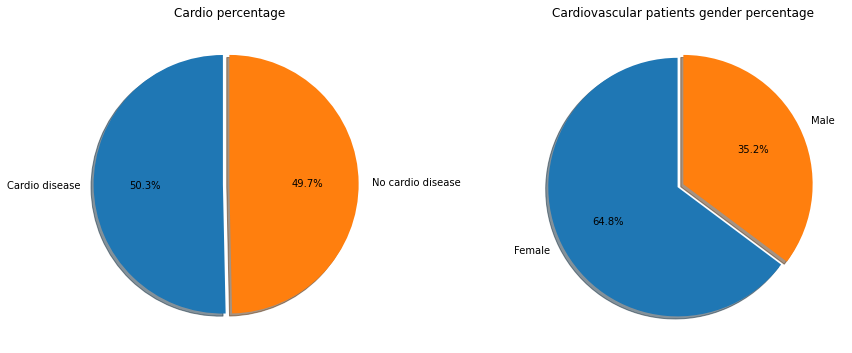

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,20))
plt.tight_layout(pad=10)
ax[0].pie(x=df['cardio'].value_counts(), labels=['Cardio disease', 'No cardio disease'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[0].title.set_text('Cardio percentage')
gender = df.query("cardio == 1").apply(lambda row: gender(row['female'], row['male']), axis=1).value_counts()
ax[1].pie(x=gender, labels=['Female', 'Male'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[1].title.set_text('Cardiovascular patients gender percentage')
;

''

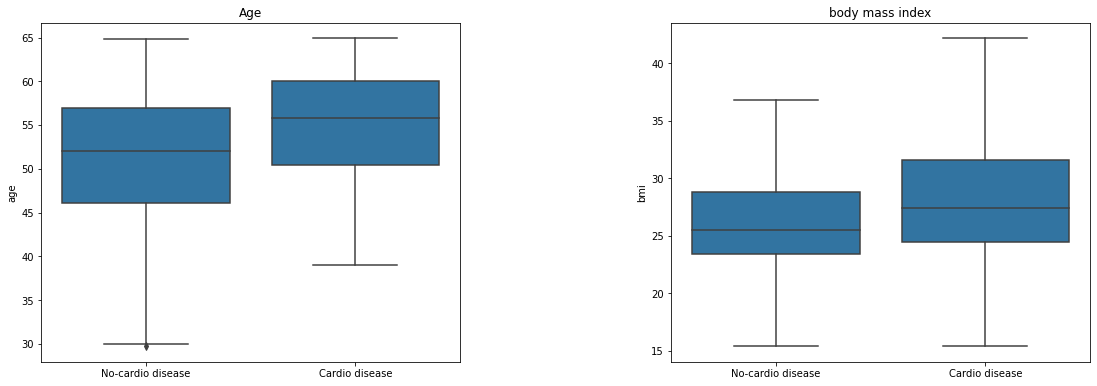

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plt.tight_layout(pad=18)
sb.boxplot(data=df, x='cardio', y='age', ax=ax[0], color=base_color)
sb.boxplot(data=df, x='cardio', y='bmi', showfliers=False, ax=ax[1], color=base_color)
ax[0].title.set_text('Age')
ax[0].set_xticklabels(['No-cardio disease', 'Cardio disease'])
ax[1].title.set_text('body mass index')
ax[1].set_xticklabels(['No-cardio disease', 'Cardio disease'])
ax[0].set_xlabel("")
ax[1].set_xlabel("")
;

''

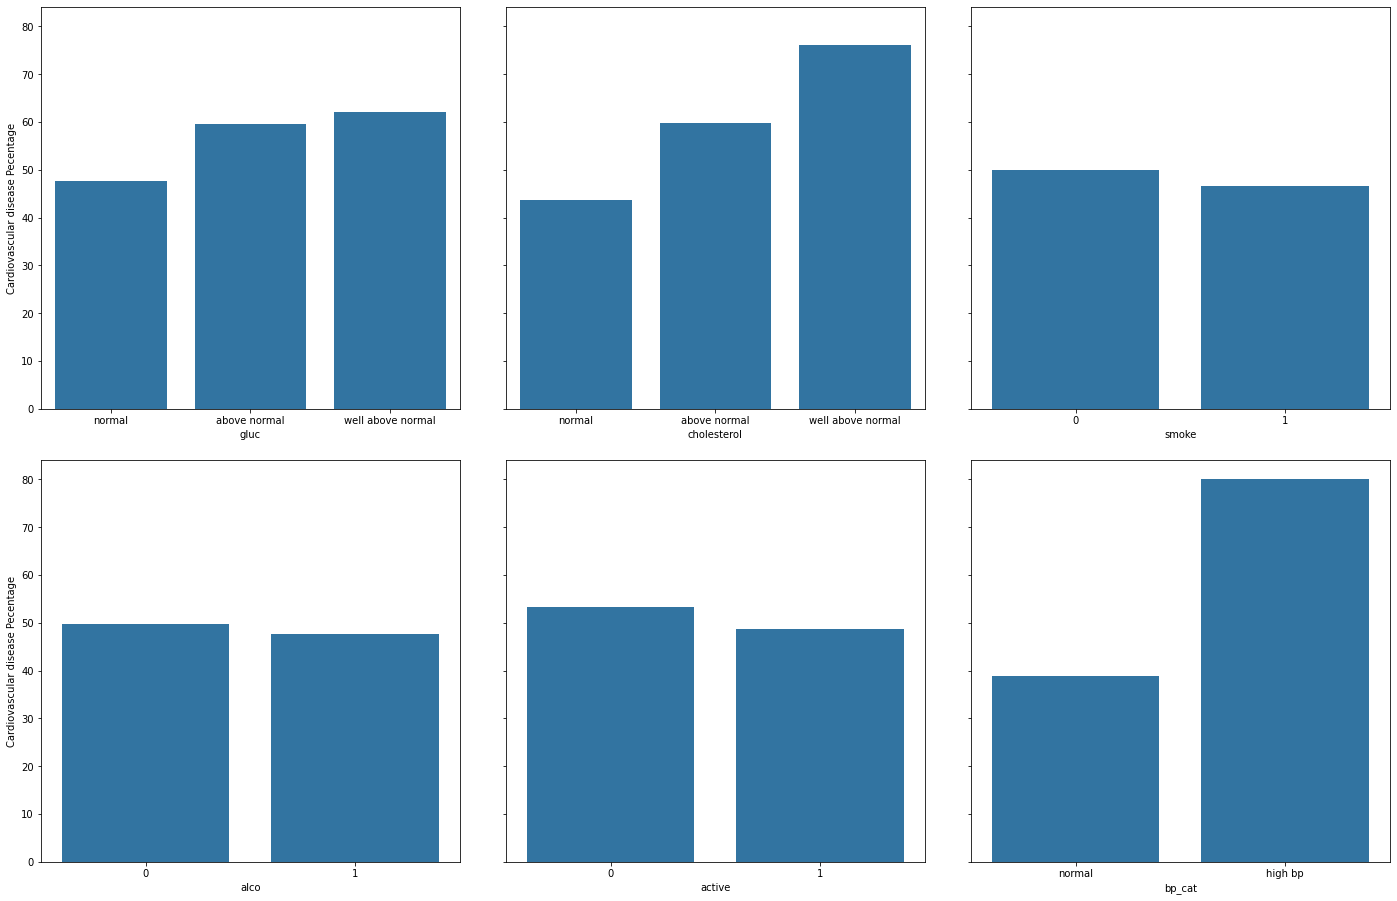

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,13), sharey=True)
plt.tight_layout(pad=3)


df_gluc = df.groupby('gluc').mean()
sb.barplot(data=df_gluc, x=df_gluc.index, y='cardio', ax=ax[0][0], color=base_color)
ax[0][0].set_xticklabels(['normal', 'above normal', 'well above normal'])
ax[0][0].set_yticks(np.arange(0, 1.2, 0.1))
ax[0][0].set_yticklabels(np.arange(0, 120, 10))

df_cholesterol = df.groupby('cholesterol').mean()
sb.barplot(data=df_cholesterol, x=df_cholesterol.index, y='cardio', ax=ax[0][1], color=base_color)
ax[0][1].set_xticklabels(['normal', 'above normal', 'well above normal'])

df_smoke = df.groupby('smoke').mean()
sb.barplot(data=df_smoke, x=df_smoke.index, y='cardio', ax=ax[0][2], color=base_color)

df_alco = df.groupby('alco').mean()
sb.barplot(data=df_alco, x=df_alco.index, y='cardio', ax=ax[1][0], color=base_color)

df_active = df.groupby('active').mean()
sb.barplot(data=df_active, x=df_active.index, y='cardio', ax=ax[1][1], color=base_color)

df_bp = df.groupby('bp_cat').mean()
sb.barplot(data=df_bp, x=df_bp.index, y='cardio', ax=ax[1][2], color=base_color,
           order=[0, 1])
ax[1][2].set_xticklabels(['normal', 'high bp'])

plt.setp(ax[:, :], ylabel='')
plt.setp(ax[:, 0], ylabel='Cardiovascular disease Pecentage')
;

# Corellation Matrix


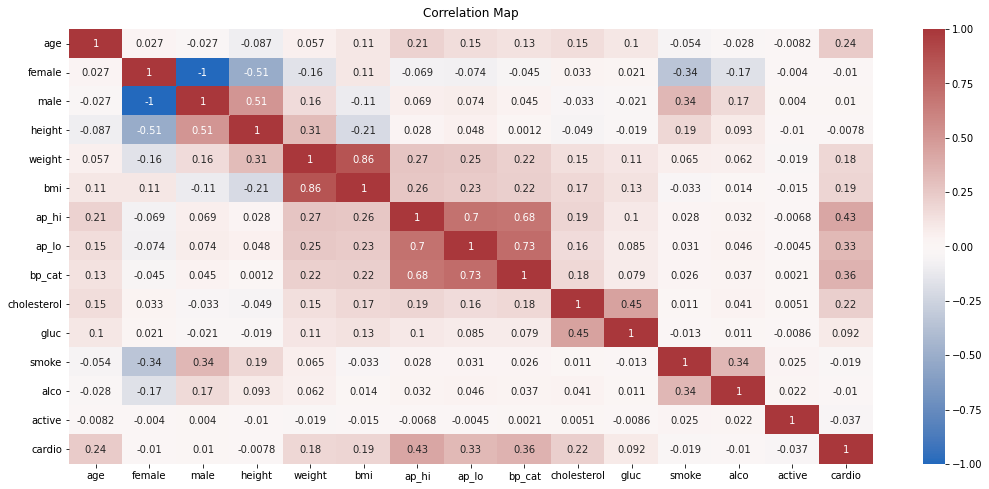

In [ ]:
# Correlation matrix to understand relation between variables

plt.figure(figsize=(18, 8))
sb.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag') # cmap='BrBG'
plt.title('Correlation Map', fontdict={'fontsize':12}, pad=12);

Looking into the correlation heatmap, it seems like our target has higher correlation with age, weight, bmi, ap_hi, ap_lo, bp_cat, cholestrol.



# Shapely Values

In [ ]:
!pip install shap
import shap
# load JS visualization code to notebook
shap.initjs()

In [ ]:
X = df.drop(['cardio', 'bp_cat'], axis=1)
y = df['cardio']

In [ ]:
from xgboost.sklearn import XGBRegressor
model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001)
# Fit the Model
model.fit(X, y)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

[08:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

# Logistic Regression after Adding Latent Variable to Dataset

In [ ]:
X_new = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13]].values
y_new = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_new = sc.fit_transform(X_train_new)
X_test_new = sc.transform(X_test_new)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_new = LogisticRegression(random_state = 0)
classifier_new.fit(X_train_new, y_train_new)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_new = classifier_new.predict(X_test_new)
print(np.concatenate((y_pred_new.reshape(len(y_pred_new),1), y_test_new.reshape(len(y_test_new),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_new = confusion_matrix(y_test_new, y_pred_new)
print(cm_new)
accuracy_score(y_test_new, y_pred_new)

[[3895  993]
 [1639 3154]]


0.7281272595806219

# Multi-Layer Perceptron Neural Network with Keras

In [ ]:
# first neural network with keras make predictions
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
# split into input (X) and output (y) variables
# X = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13]].values
# y = df.iloc[:, -1].values
# define the keras model
model = Sequential()
model.add(Dense(17, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train_new, y_train_new, epochs=150, batch_size=10)


Epoch 1/150
2905/2905 [==============================] - 6s 2ms/step - loss: 0.5669 - accuracy: 0.7165
Epoch 2/150
2905/2905 [==============================] - 5s 2ms/step - loss: 0.5511 - accuracy: 0.7295
Epoch 3/150
2905/2905 [==============================] - 5s 2ms/step - loss: 0.5486 - accuracy: 0.7316
Epoch 4/150
2905/2905 [==============================] - 5s 2ms/step - loss: 0.5471 - accuracy: 0.7310
Epoch 5/150
2905/2905 [==============================] - 5s 2ms/step - loss: 0.5461 - accuracy: 0.7329
Epoch 6/150
2905/2905 [==============================] - 5s 2ms/step - loss: 0.5449 - accuracy: 0.7330
Epoch 7/150
2905/2905 [==============================] - 5s 2ms/step - loss: 0.5445 - accuracy: 0.7348
Epoch 8/150
2905/2905 [==============================] - 5s 2ms/step - loss: 0.5438 - accuracy: 0.7338
Epoch 9/150
2905/2905 [==============================] - 5s 2ms/step - loss: 0.5431 - accuracy: 0.7332
Epoch 10/150
2905/2905 [==============================] - 5s 2ms/step - l

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train_new, y_train_new)
print('Accuracy: %.2f' % (accuracy*100))

908/908 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7386
Accuracy: 73.86


# Muller loop : KNN Regressor, Gradient Boost Regressor, Random Forest Regressor, MLP Regressor, Linear Regressor

In [ ]:
import numpy as np
import time
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, ensemble
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# X = dataset[:,0:13]
# Y = dataset[:,13]
# X_train, X_test, y_train, y_test = \
#     train_test_split(X, y, test_size=.2)

names = ["KNN Regressor", "Gradient Boost Regressor", "Random Forest Regressor" ,
         "MLP Regressor", "Linear Regressor"
        ]
classifiers = [
    KNeighborsRegressor(n_neighbors=2),
    ensemble.GradientBoostingRegressor(n_estimators=500,
          max_depth= 4,
          min_samples_split= 5,
          learning_rate=0.01,
          loss='ls'),
    RandomForestRegressor(max_depth=2, random_state=0),
    MLPRegressor(random_state=1, max_iter=1000),
    LinearRegression()]
  
min_mse_score = 100.0
min_mae_score=100.0
min_rmse_error=100.0
min_mse_class = ''
min_mae_class=''
min_rmse_class=''
meansquare_error=[]
meanabsolute_error=[]
rootmeansquare_error=[]
# iterate over regressors
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train_new, y_train_new)
    y_pred=clf.predict(X_test_new)
    # cm1 = confusion_matrix(y_test,y_pred)
    meansquare = metrics.mean_squared_error(y_test_new, y_pred)
    meansquare_error.append(meansquare.copy())
    meanabsolute=metrics.mean_absolute_error(y_test_new, y_pred)
    meanabsolute_error.append(meanabsolute.copy())
    rootmeansquare=np.sqrt(metrics.mean_squared_error(y_test_new, y_pred))
    rootmeansquare_error.append(rootmeansquare.copy())
    print('Regressor: ',name)
    print('Mean Absolute Error:', meanabsolute)  
    print('Mean Squared Error:', meansquare)  
    print('Root Mean Squared Error:', rootmeansquare)
    
    print(100*'=')
    
    if meansquare < min_mse_score:
        clf_best = clf
        min_mse_score = meansquare
        min_mse_class = name
    if meanabsolute < min_mae_score:
        min_mae_score=meanabsolute
        min_mae_class= name
    if rootmeansquare < min_rmse_error:
        min_rmse_error=rootmeansquare
        min_rmse_class=name

Regressor:  KNN Regressor
Mean Absolute Error: 0.3669042454291912
Mean Squared Error: 0.2738353475880591
Root Mean Squared Error: 0.5232927933653005
Regressor:  Gradient Boost Regressor
Mean Absolute Error: 0.3653622442422205
Mean Squared Error: 0.1796910707357981
Root Mean Squared Error: 0.4238998357345731
Regressor:  Random Forest Regressor
Mean Absolute Error: 0.38484100979921104
Mean Squared Error: 0.19122238439948586
Root Mean Squared Error: 0.4372898173974394
Regressor:  MLP Regressor
Mean Absolute Error: 0.36827752272602265
Mean Squared Error: 0.1839351931629191
Root Mean Squared Error: 0.42887666427881
Regressor:  Linear Regressor
Mean Absolute Error: 0.38765794154060607
Mean Squared Error: 0.18935364541812244
Root Mean Squared Error: 0.4351478431730099


In [ ]:
print(100*'-' )
print('Best --> Regressor = %s, Mean Squared Error = %.2f' %(min_mse_class, min_mse_score))
print('Best --> Regressor = %s, Mean Absolute Error = %.2f' %(min_mae_class, min_mae_score))
print('Best --> Regressor = %s, Root Mean Squared Error = %.2f' %(min_rmse_class, min_rmse_error))

----------------------------------------------------------------------------------------------------
Best --> Regressor = Gradient Boost Regressor, Mean Squared Error = 0.18
Best --> Regressor = Gradient Boost Regressor, Mean Absolute Error = 0.37
Best --> Regressor = Gradient Boost Regressor, Root Mean Squared Error = 0.42


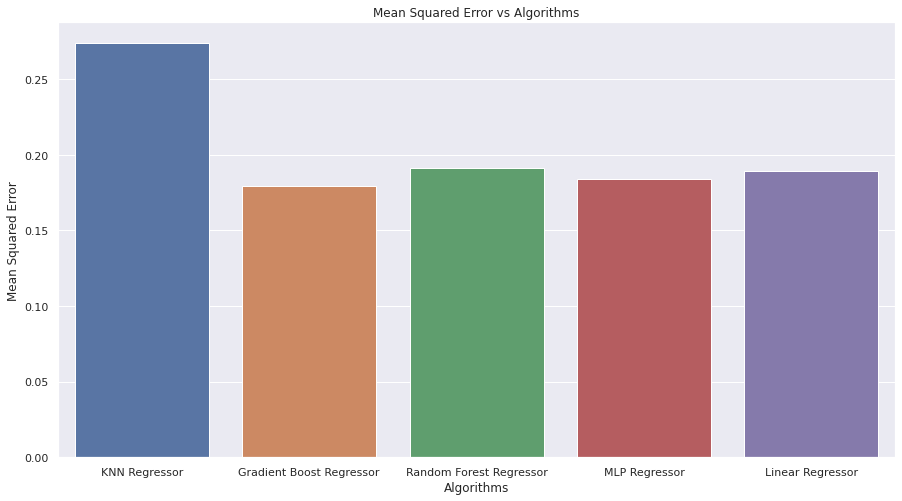

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
plt.title("Mean Squared Error vs Algorithms")
plt.xlabel("Algorithms")
plt.ylabel("Mean Squared Error")
sns.barplot(x = names, y = meansquare_error)

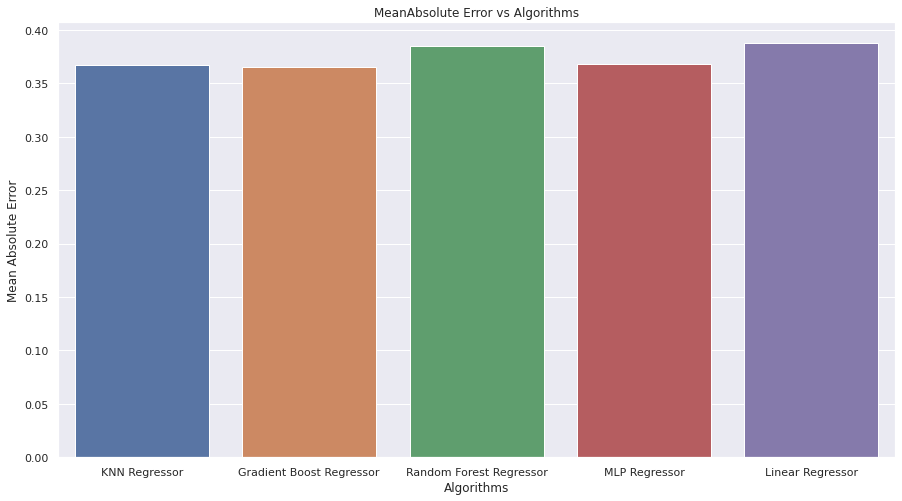

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
plt.title("MeanAbsolute Error vs Algorithms")
plt.xlabel("Algorithms")
plt.ylabel("Mean Absolute Error")
sns.barplot(x = names, y = meanabsolute_error)

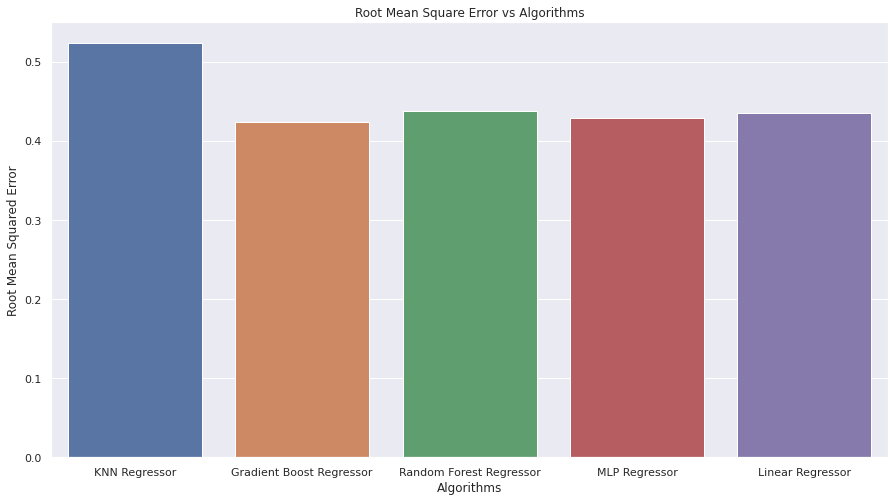

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
plt.title("Root Mean Square Error vs Algorithms")
plt.xlabel("Algorithms")
plt.ylabel("Root Mean Squared Error")
sns.barplot(x = names, y = rootmeansquare_error)